In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
file_path = '/content/godishala regression.xlsx'  # replace with your file path
data = pd.read_excel(file_path,  parse_dates=['DATE'], index_col='DATE')

In [3]:
power_column = data['POWER (KW)']
mean_power = power_column.mean()
max_power = power_column.max()
normalized_power = power_column / max_power
print(max_power)
data['Normalized POWER (KW)'] = normalized_power

6306.206464769449


In [4]:
data['Load_Lag_72'] = data['POWER (KW)'].shift(72)
data['Load_Lag_24'] = data['POWER (KW)'].shift(24)
data['Load_Lag_48'] = data['POWER (KW)'].shift(48)
data['Load_Lag_1'] = data['POWER (KW)'].shift(1)
data['Temp_Lag_24'] = data['Temp (F)'].shift(24)
data['Temp_Lag_48'] = data['Temp (F)'].shift(48)
#data['Humidity_lag_72'] = data['Humidity (%)'].shift(72)
data['Humidity_lag_48'] = data['Humidity (%)'].shift(48)
#data['Temp_Lag_72'] = data['Temp (F)'].shift(72)  # 1 day lag for hourly data
data['Humidity_lag_24'] = data['Humidity (%)'].shift(24)

In [5]:
data.dropna(inplace=True)

In [6]:
x = data[['Load_Lag_24','Load_Lag_48','"WEEKEND/WEEKDAY"','SEASON','Temp_Lag_24','Humidity_lag_24','Load_Lag_1','Load_Lag_72','Temp_Lag_24','Humidity_lag_24']]
y = data['Normalized POWER (KW)'].values


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42)


In [8]:
!pip install sklearn
!pip install --upgrade scikit-learn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.metrics import mean_squared_error
x_train_scaled = scaler.fit_transform(x_train)

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 59.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [9]:
x_test_scaled = scaler.transform(x_test)
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio is the mix between L1 and L2 regularization
elastic_net_model.fit(x_train_scaled, y_train)

# Make predictions
elastic_net_predictions = elastic_net_model.predict(x_test_scaled)

In [10]:
mae = mean_absolute_error(y_test, elastic_net_predictions)
elastic_net_mse = mean_squared_error(y_test, elastic_net_predictions)
elastic_net_r2 = r2_score(y_test, elastic_net_predictions)
print('MAE:', mae)
print(f'Elastic Net Mean Squared Error: {elastic_net_mse}')
print(f'Elastic Net R² Score: {elastic_net_r2}')

MAE: 0.06596271780510686
Elastic Net Mean Squared Error: 0.007380977415109751
Elastic Net R² Score: 0.8223676454299549


In [13]:
#actual = np.array(y_test)
#predicted = np.array(elastic_net_predictions)

    # Calculate absolute percentage errors
absolute_percentage_errors = np.abs((y_test - elastic_net_predictions) / y_test)
summation=sum(absolute_percentage_errors)
print(summation)
mean=summmation/len(absolute_percentage_errors)
    # Calculate mean absolute percentage error
mape = mean*100
print(mape)


701.8872079784786
26.923176370482494


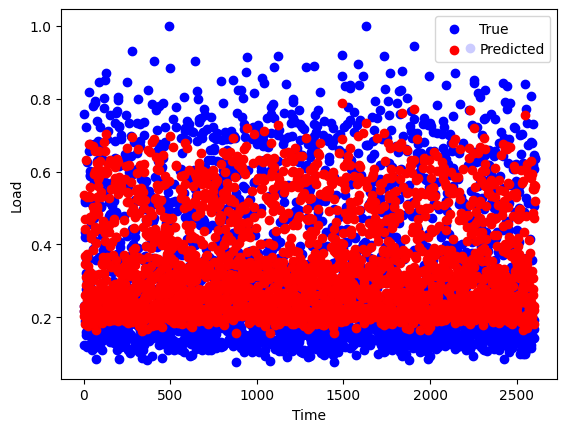

In [ ]:
plt.scatter(range(len(y_test)), y_test, color='blue', label='True')
plt.scatter(range(len(elastic_net_predictions)), elastic_net_predictions, color='red', label='Predicted')
plt.xlabel('Time')
plt.ylabel('Load')
plt.legend()
plt.show()